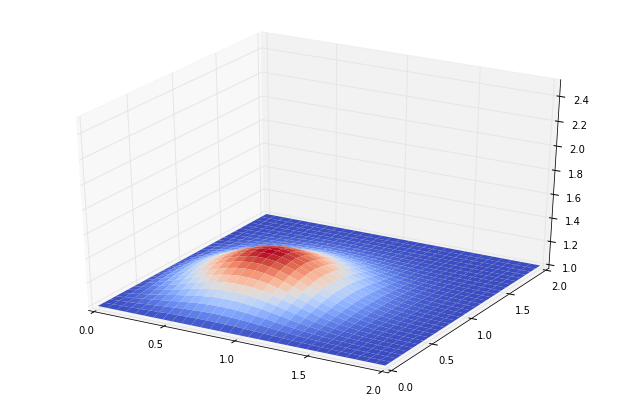

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def run(n, NT, nu, color):
    y, dy = x, dx = np.linspace(0,2,n, retstep=True)
    X, Y = np.meshgrid(x,y)
    sigma = .25
    dt = dx*sigma*dy/nu
    u = np.ones((n,n))
    u[(.5 <= X) * (X <= 1) * (.5 <= Y) * (Y <= 1)] = 2
    v = u.copy()
    
    for t in range(NT):
        u_back_x = u[:-2,1:-1]
        u_back_y = u[1:-1,:-2]
        u_forw_x = u[2:,1:-1]
        u_forw_y = u[1:-1,2:]
        u_center = u[1:-1,1:-1]
        
        v_back_x = v[:-2,1:-1]
        v_back_y = v[1:-1,:-2]
        v_forw_x = v[2:,1:-1]
        v_forw_y = v[1:-1,2:]
        v_center = v[1:-1,1:-1]                
                           
        u[1:-1,1:-1] = u_center +nu*dt/dx**2*(u_forw_x - 2*u_center + u_back_x) +\
                nu*dt/dy**2*(u_forw_y - 2*u_center + u_back_y) 
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    ax.set_zlim(1,2.5)
    surf = ax.plot_surface(X,Y,u, cmap=cm.coolwarm, cstride=1, rstride=1, linewidth=0)
run(31, 50, .05, "b")